<a href="https://colab.research.google.com/github/pavanyendluri588/Face_Recognition_System/blob/master/cnn_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
from tensorflow.keras import layers,models,datasets
from matplotlib import pyplot as plt 

In [2]:
(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
import cv2
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
    plt.ylabel("")
plt.show()



In [4]:
import pandas as pd

cnn_model= models.Sequential()
cnn_model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
cnn_model.add(layers.MaxPooling2D((2,2)))
cnn_model.add(layers.Conv2D(64,(3,3),activation="relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))
cnn_model.add(layers.Conv2D(64,(4,4),activation="relu"))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(30,activation="relu"))
cnn_model.add(layers.Dense(15,activation="relu"))
cnn_model.add(layers.Dense(10,activation="relu"))

In [5]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          65600     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [6]:
cnn_model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
model_fit_data=cnn_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 83s 52ms/step - loss: 2.0882 - accuracy: 0.2542 - val_loss: 1.7820 - val_accuracy: 0.3723
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6542 - accuracy: 0.4141 - val_loss: 1.5380 - val_accuracy: 0.4701
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4653 - accuracy: 0.4888 - val_loss: 1.4429 - val_accuracy: 0.4941
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.3553 - accuracy: 0.5296 - val_loss: 1.3357 - val_accuracy: 0.5344
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2609 - accuracy: 0.5624 - val_loss: 1.2958 - val_accuracy: 0.5509
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1864 - accuracy: 0.5884 - val_loss: 1.2302 - val_accuracy: 0.5794
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1237 - accuracy: 0.6091 - val_loss: 1.2339 -

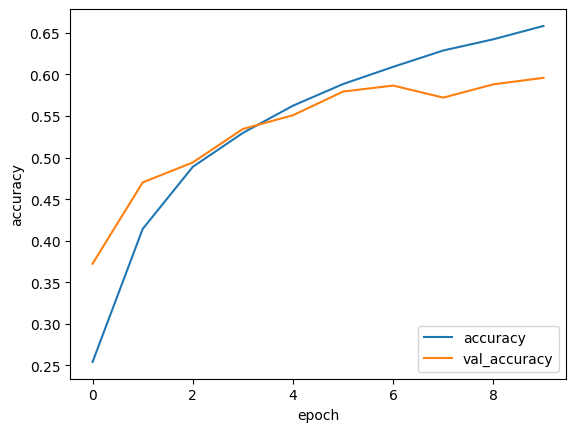

In [9]:
plt.plot(model_fit_data.history["accuracy"],label="accuracy")
plt.plot(model_fit_data.history["val_accuracy"],label="val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="lower right")
plt.show()